In [1]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2023-09-01 19:19:47--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2023-09-01 19:19:47 (29.6 MB/s) - ‘dataset.py’ saved [917/917]

--2023-09-01 19:19:47--  https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_

In [2]:
# 1. Import libraries and modules
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

In [3]:
np.random.seed(123)  # for reproducibility

In [4]:
# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

In [5]:
# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

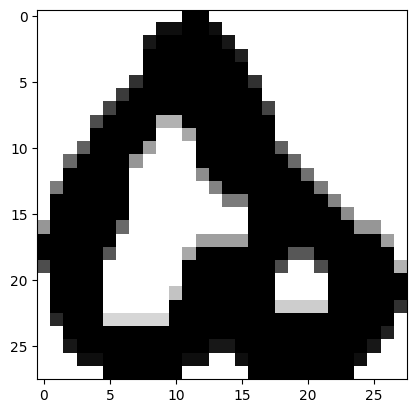

In [7]:
plt.subplot()
plt.imshow(x_train[7], cmap=plt.cm.gray_r)

In [8]:
# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [9]:
# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

In [10]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# 7. Fit model on training data
history = model.fit(x_train, y_train,
          epochs=58, batch_size=256, validation_data = (x_val, y_val))

Epoch 1/58
14/14 [==============================] - 11s 598ms/step - loss: 2.1122 - accuracy: 0.3009 - val_loss: 1.5693 - val_accuracy: 0.6800
Epoch 2/58
14/14 [==============================] - 9s 625ms/step - loss: 1.2905 - accuracy: 0.5769 - val_loss: 0.5846 - val_accuracy: 0.8100
Epoch 3/58
14/14 [==============================] - 6s 440ms/step - loss: 0.7768 - accuracy: 0.7486 - val_loss: 0.3358 - val_accuracy: 0.8750
Epoch 4/58
14/14 [==============================] - 4s 276ms/step - loss: 0.5562 - accuracy: 0.8220 - val_loss: 0.2602 - val_accuracy: 0.9250
Epoch 5/58
14/14 [==============================] - 4s 298ms/step - loss: 0.4833 - accuracy: 0.8380 - val_loss: 0.2490 - val_accuracy: 0.9100
Epoch 6/58
14/14 [==============================] - 3s 234ms/step - loss: 0.4208 - accuracy: 0.8617 - val_loss: 0.1742 - val_accuracy: 0.9500
Epoch 7/58
14/14 [==============================] - 3s 220ms/step - loss: 0.3327 - accuracy: 0.8857 - val_loss: 0.1681 - val_accuracy: 0.9500
Epoch

In [13]:
# Test on unseen data
results = model.evaluate(x_val, y_val)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

7/7 [==============================] - 0s 18ms/step - loss: 0.0739 - accuracy: 0.9800
Final test set loss: 0.073938
Final test set accuracy: 0.980000


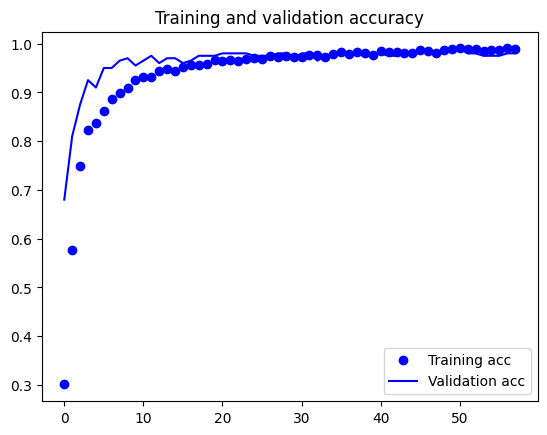

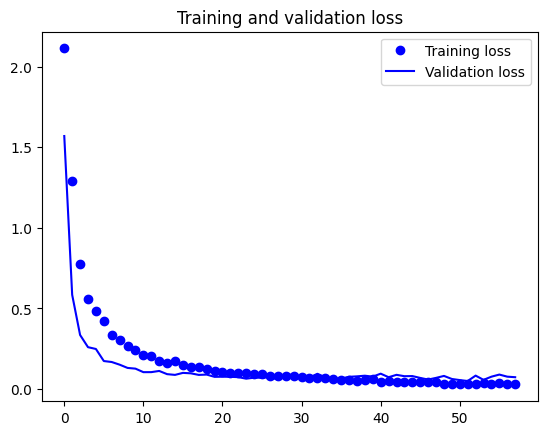

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()